<a href="https://colab.research.google.com/github/TeodorRusKvi/Prosjekter/blob/main/Kopi_av_Semesteroppgave_Matte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\textbf{Introduction}$
In the dynamic landscape of financial markets, the application of mathematical models is of utter importance when predicting, and optimizing investment strategies. In this term paper we will delve into this subject matter, specifically focusing on the mathematical modeling of stock data. Application of mathematics on financial objects allows investors to make optimal decisions in regards to risk and return, two central concepts in finance.

This paper will revolve around three key mathematical models: Portfolio Optimization, Forecasting and Time Series Analysis. These models will allow us to apply different mathematical methods in an attempt to create and optimize a stock portfolio before further predicting its performance. The purpose of the time series analysis is to see the dynamics of the historical prices. This can help us understand if the results from the forecasting make any sense.

Portfolio optimization is a cornerstone of modern investment theory as pioneered by Harry Markowitz. This method involves constructing a diversified portfolio that attains the optimal balance between risk and return, taking into account various assets and their interdependencies. By leveraging mathematical techniques, investors can systematically allocate resources to achieve an optimal portfolio that aligns with their risk tolerance and financial objectives. We will here be using nonlinear programming to attain our optimal composition of stocks. (Investopedia, 2023)

In the next chapter we will forecast our future predictions based on the parameters from the portifolio estimation. We will make a differential equation with the the estimated daily return as the deterministic component and the estimated standard deviation as the stochastic component. We will use a numerical method called Eulers Method to solve the differential equation. The goal is to see how a model can predict the future based on estimated parameters.
This proactive approach empowers investors with the foresight needed to make informed decisions in the face of uncertainty.

Futhermore we will explore Time Series Analysis, a powerful tool for unraveling trends, seasonality, cycles and residuals within stock data over time. By utilizing statistical and mathematical techniques, such as OLS regression and Fourier Analysis we can identify the past performance patterns faciliating a deeper understanding of market dynamics. To detect the trends and cycles we will use matrix multiplication and different types of time series. The seasonality in the data can be found through Dicrete Fourier analysis, a powerful tool to find frequencies within data.

Using these models we hope to attain a better understanding of financial markets and how mathematics can be applied as an aid when making investment decisions.

As we have been working two on the project we have had to divide the work to be done by each individual leading to specialization in our work. We have chosen to structure ourselves as an adhocracy employing mutual adaptation as a coordination mechanism. Self-organization has allowed us freedom to explore our individual issues and create optimal applications of mathematical models.

Candidate 10018 has taken upon himself to prepare the data for further procedures as seen in chapter 1 before creating a Portfolio Optimization model in chapter 2.

Candidate X expanded upon this work when forecasting in chapter 3 and performing a Time Series Analysis in chapter 4.

The writing done in the introductory and concluding parts was done by both parts, each presenting their own work.

# $\textbf{1. Data preparation}$

We have chosen to base our models on real-life stock data consisting of 20 stocks based on a few simple criteria.  We require the stocks to have a sizable market capitalization, have at least 10 years of historical data to draw upon and be relatively stable. We have therefore chosen the 20 largest stocks that fulfill our criteria. These companies are also relatively diversified across different sectors to further hedge our portfolio against impactful macroeconomic conditions that might affect certain industries more than others.

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import linprog, minimize, curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq

In [26]:
#Define the stocks used from each sector, requiring at least 10 years of stock data,
#Using those with highest market cap
#Basic Materials: Norsk Hydro, Yara AS
#Consumer Staples: Mowi, Salmar, Orkla, Lerøy Seafood Group, Bakkafrost
#Energy: Equinor ASA, Aker BP, Subsea 7
#Financial: DNB Bank ASA, Gjensidige Forsikring ASA, Aker, Storebrand, Sparebank 1 SR-Bank
#Industrials: Kongsberg Gruppen, Frontline PLC, Wallenius Wilhelmsen, Tomra Systems
#Telcom: Telenor ASA

tickers = sorted(["EQNR.OL", "DNB.OL", "AKRBP.OL", "TEL.OL", "NHY.OL","MOWI.OL", "YAR.OL", "GJF.OL","KOG.OL",
           "SALM.OL","ORK.OL","FRO.OL","AKER.OL","SUBC.OL","STB.OL","WAWI.OL","SRBNK.OL","BAKKA.OL",
           "LSG.OL","TOM.OL"])
stock_names = sorted(["Equinor ASA","DNB Bank ASA", "Aker BP ASA", "Telenor ASA","Norsk Hydro ASA","Mowi ASA",
            "Yara International ASA","Gjensidige Forsikring ASA", "Kongsberg Gruppen ASA", "SalMar ASA",
            "Orkla ASA", "Frontline plc", "Aker ASA", "Subsea 7 S.A.", "Storebrand ASA","Wallenius Wilhelmsen ASA",
            "SpareBank 1 SR-Bank ASA", "Bakkafrost P/F", "Lerøy Seafood Group ASA", "Tomra Systems ASA"])

# Download historical stock data from Yahoo Finance
data = yf.download(tickers, start='2013-01-01', end='2023-01-01')['Adj Close']

[*********************100%%**********************]  20 of 20 completed


We download stock price data for the given stocks ranging all trading days from 2013-01-01 to 2023-01-01, the price data is acquired from Yahoo Finance and converted into a
`pandas` DataFrame .

We will now perform a simple exploration procedure of our data to make sure everything is correct.

In [27]:
print(data.describe())

# Display rows where 'DNB.OL' has missing values
missing_values_rows = data[data['DNB.OL'].isnull()]

# Display the entire DataFrame with missing values highlighted
print("Rows with missing values:")
print(missing_values_rows["DNB.OL"])

           AKER.OL     AKRBP.OL     BAKKA.OL       DNB.OL      EQNR.OL  \
count  2510.000000  2510.000000  2510.000000  2469.000000  2510.000000   
mean    320.003641   134.876820   358.366103   102.019524   147.519890   
std     216.020282    87.113403   204.970088    38.569206    67.265861   
min      83.987320    19.568773    43.567791    41.165592    71.676506   
25%     114.965740    51.371468   188.877026    67.711983   102.192200   
50%     246.598541   122.402332   328.501053   101.366478   127.599880   
75%     462.409790   203.450226   545.034286   119.276573   163.884140   
max     858.668335   367.995605   767.192627   192.289581   390.729340   

            FRO.OL       GJF.OL       KOG.OL       LSG.OL      MOWI.OL  \
count  2510.000000  2510.000000  2510.000000  2510.000000  2510.000000   
mean     71.883773   118.773551   132.141194    39.648352   129.998364   
std      24.829607    44.618835    78.415530    19.143923    58.285728   
min      29.303154    42.992722    65

We find that the DNB Bank ASA stock is missing price data from July and August 2021. To fill in the missing data we will use simple linear interpolation. Linear interpolation is a mathematical method that involves estimating the unknown prices by drawing straight lines between adjacent known data points and assigning values along these lines based on the proportion of the distances between the known points.(Apple Developer, 2023)



In [28]:
data['DNB.OL'] = data['DNB.OL'].interpolate()

 We will also be requiring a risk-free interest rate, for this we have chosen the risk-free rate of 3,5% as stated for November and December of 2023 by The Norwegian Tax Administration. (Skatteetaten, 2023)

In [29]:
# Norwegian risk-free rate
RF_RATE = 0.035

As a first step in our course of action and to give us an overview of our situation we would like to calculate the expected returns and volatility for each stock. We first calculate the daily returns, by using this simple formula for pecentage change: $$r  = \frac{P_{t}-P_{t-1}}{P_{t-1}}$$

In [30]:
# Create DataFrame to store daily returns
returns = pd.DataFrame()

# Calculate daily returns
for column in data.columns:
    daily_return = (data[column] - data[column].shift(1)) / data[column].shift(1)
    returns[column] = daily_return

# Drop the first row since it will have NaN value (no previous day's price for the first day)
returns = returns.dropna()


To aggregate the expected returns and volatilities we first calculate the mean of the returns for each stock by dividing the sum of all individual returns for every stock by the number of observations $n$ giving us the expected return (Chen, 2023):

<br>

 $${E(r)}=\frac{\sum_{i=1}^n r_i}{n}$$

In [31]:
# Create an empty array (vector)
expected_returns = np.zeros(len(returns.columns))

    # Iterate over each column (stock) in the DataFrame
for i, column in enumerate(returns.columns):
        returns_sum = sum(returns[column])
        num_returns = len(returns[column])
        mean_return = returns_sum / num_returns
        expected_returns[i] = mean_return


To further calculate the stock volatilities we can use the expected return $E(r)$ to calculate the sample variance of each stock by finding the average of the squared differences from the mean. Taking the square root of the result we find the sample standard deviation, or in this context, volatility. We use sample variance instead of population variance as we have a select sample of stocks, therefore we divide by $n-1$.
$$s=\sqrt{ \frac{  \sum_{i=1}^N( r_{i}-E(r))^2  }{n-1} }$$

In [32]:
# Create an empty array (vector)
volatility = np.zeros(len(returns.columns))

for i, column in enumerate(returns.columns):
    squared_diff = [(ret - expected_returns[i]) ** 2 for ret in returns[column]]
    num_returns = len(returns[column])
    sample_variance = sum(squared_diff) / (num_returns - 1)
    sample_stdev = np.sqrt(sample_variance)
    volatility[i] = sample_stdev
volatility

array([0.02137164, 0.02690471, 0.02028217, 0.01656043, 0.01863849,
       0.03888658, 0.01316203, 0.01801533, 0.01994875, 0.01732141,
       0.020884  , 0.01256053, 0.02096606, 0.01690676, 0.01996353,
       0.02524753, 0.01339253, 0.02041768, 0.02650129, 0.01667315])

In addition, we will require a covariance matrix of the returns for all the stocks in further calculations. Here we compute the pairwise sample covariance of returns for all possible combinations of stocks, for 2 stocks the formula is as follows:

<br>

$$Cov(r_x, r_y)=\sqrt{ \frac{  \sum_{i=1}^N( r_x^i- {E(r_{x})})*( r_y^i- {E(r_{y})})  }{n-1} }$$

<br>

Solving this equation for all combinations of stocks would involve $\sum_{n=1}^{20} n = 210$ individual calculations. We could make the job very easy for ourselves by using the `pandas` function `cov()` which conveniently returns a DataFrame matrix of all covariances which we can use in upcoming problems. This command computes the above formula $Cov(r_x, r_y)\ for\ x,y = 1,2,..,n$ where $x, y$ are all the stock combinations. Just for fun, we can also use matrix multiplication for this task using the formula:

<br>

$$\sum{}=\frac{1}{n}(X-\overline{X})^T\cdot(X-\overline{X})$$

<br>

Here $X$ denotes the return matrix, `returns`, while $\overline{X}$ denotes the expected return vector, `expected_returns`. Using matrix multiplication we arrive at the same covariance matrix. You can clearly see the similarities between this formula and the previous one.

<br>

$$X=
\begin{bmatrix}
r_{1AKER}& r_{1AKRBP}& \cdots  & r_{1YAR}\\
r_{2AKER}& r_{2AKRBP}& \cdots  & r_{2YAR}\\
\vdots& \vdots & \ddots & \vdots  \\
r_{2510AKER}& r_{2510AKRBP}& \cdots  & r_{2510YAR}\\
\end{bmatrix}
\overline{X} = \begin{bmatrix}
 E(r_{AKER})\\
 E(r_{AKRBP})\\
 \cdots \\
 E(r_{YAR})
\end{bmatrix}
$$

<br>

$$\sum{}=
\begin{bmatrix}
{Cov}(E(r_{AKER}), E(r_{AKER}))& {Cov}(E(r_{AKER}), E(r_{AKRBP}))& \cdots  & {Cov}(E(r_{AKER}), E(r_{YAR}))\\
{Cov}(E(r_{AKRBP}), E(r_{AKER}))& {Cov}(E(r_{AKRBP}), E(r_{AKRBP}))& \cdots  & {Cov}(E(r_{AKER}), E(r_{YAR}))\\
\vdots& \vdots & \ddots & \vdots  \\
{Cov}(E(r_{YAR}), E(r_{YAR}))& {Cov}(E(r_{AKER}), E(r_{AKRBP}))& \cdots  & {Cov}(E(r_{YAR}), E(r_{YAR}))\\
\end{bmatrix}
$$
<br>

In [33]:
#Calculate covariance matrix
# cov_matrix = returns.cov() TOO EASY
cov_matrix = np.dot((returns-expected_returns).T,(returns-expected_returns))/len(returns)

As we are using daily data for the stock returns we need to convert all other annual data into a daily format. In this context this means converting the risk-free interest rate. This involves using the formula for long-to-short rates:

<br>

$$r_{f\ daily} = (1 + r_f)^\frac{1}{t} -1$$

<br>

Here we set $t = 252$ since there are 252 active trading days in a calendar year.

In [34]:
# Convert annual rate to daily rate
daily_rf_rate = (1 + RF_RATE) ** (1/252) - 1

After completing the introductory calculations we would like to visualize the results. We will therefore create a DataFrame showing returns in descending order (along with volatility). In addition using the `seaborn` library we will display the covariance matrix using a heatmap to better visualize the associations. Lastly we print out the daily risk-free rate.

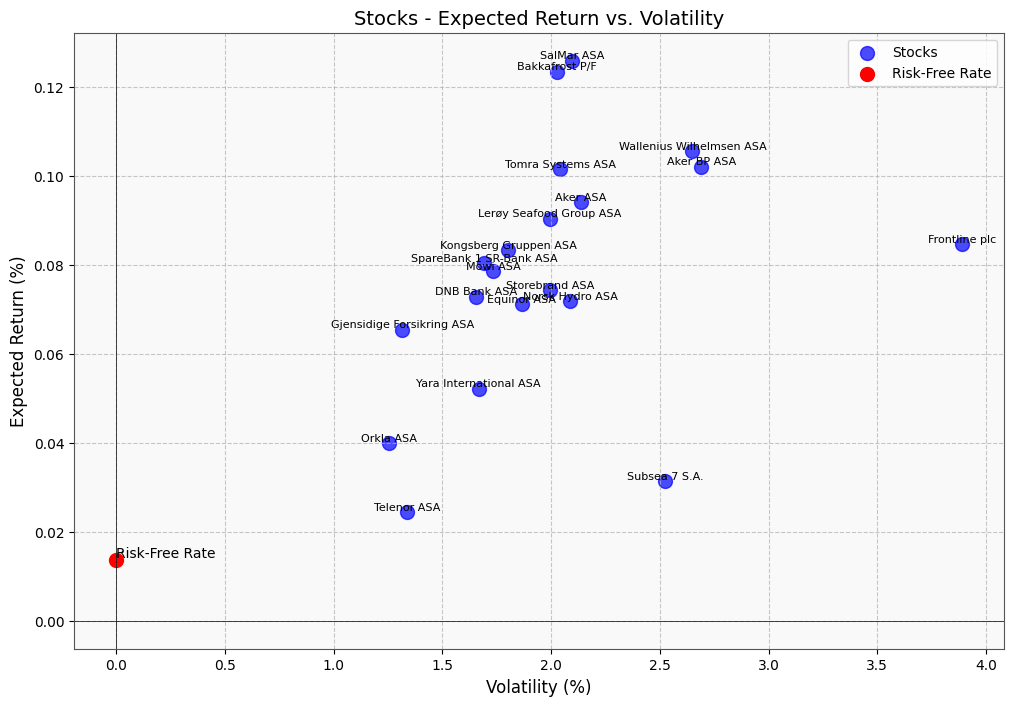

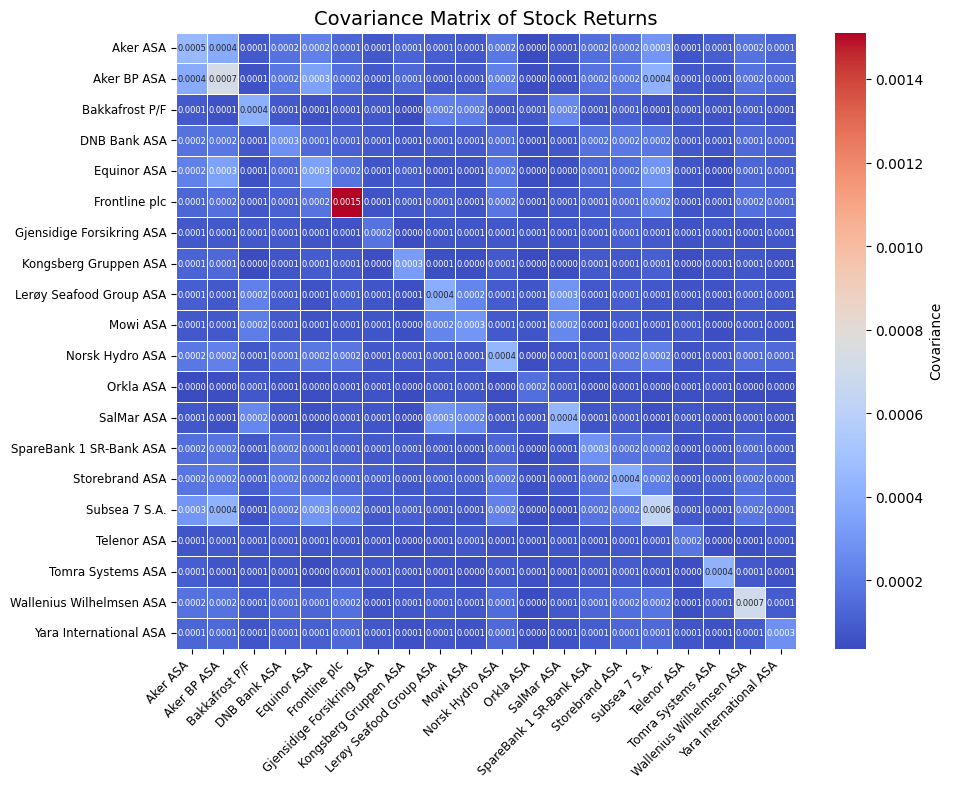

In [35]:
# Convert values to percentages
expected_returns_percent = [return_ * 100 for return_ in expected_returns]
volatility_percent = [vol * 100 for vol in volatility]
daily_rf_rate_percent = daily_rf_rate * 100

# Plot Expected Return against Volatility
plt.figure(figsize=(12, 8))
plt.scatter(volatility_percent, expected_returns_percent, marker='o', color='blue', s=100, alpha=0.7, label='Stocks')
plt.scatter(0, daily_rf_rate_percent, marker='o', color='red', s=100, label='Risk-Free Rate')

texts = [plt.text(volatility_percent[i], expected_returns_percent[i], stock_names[i], ha='center', va='bottom', fontsize=8) for i in range(len(stock_names))]
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), force_text=1, expand_text=(1.2, 1.5))

plt.text(0, daily_rf_rate_percent, 'Risk-Free Rate', ha='left', va='bottom', color='black', fontsize=10)

plt.xlabel('Volatility (%)', fontsize=12)
plt.ylabel('Expected Return (%)', fontsize=12)
plt.title('Stocks - Expected Return vs. Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.tick_params(axis='both', which='both', labelsize=10)

# Add a background color to make the plot visually appealing
ax = plt.gca()
ax.set_facecolor('#F9F9F9')

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('#555555')
    spine.set_linewidth(0.8)

plt.show()

# Visualize Covariance
plt.figure(figsize=(10, 8))

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.4f',
            xticklabels=stock_names, yticklabels=stock_names,
            annot_kws={"size": 6}, linewidths=.5, cbar_kws={'label': 'Covariance'})

plt.title('Covariance Matrix of Stock Returns', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8.5)
plt.yticks(fontsize=8.5)

plt.show()

# $\textbf{2. Portfolio optimization}$
With all the preparatory work completed we can now proceed with the first task at hand. We would like to create a mathematical model that computes the optimal combination of stocks which maximizes our profits while minimizing relative risk. For this task we have chosen one of the most widely used metrics in finance, namely the Sharpe ratio. The Sharpe ratio is a mathematical equation that compares the return on an investment with its risk. More precisely: "A measure of an investment's risk-adjusted performance, calculated by comparing its return to that of a risk-free asset.".(Fernando, 2023) In mathematical sense we can express this as:

<br>

$${Sharpe\ ratio} = \frac {E(r_p) - r_f}{\sigma_p}$$

<br>

where $r_p$ and $\sigma_p$ represent the portfolio return and volatility respectively. In simple the terms the ratio tells us to which degree excess returns historically were accompanied by excess volatility. Generally speaking, the Sharpe ratio has a strongly positive correlation with risk-adjusted return. Based on this information we can evaluate a portfolio's risk-adjusted performance and design an optimally distributed portfolio based on historical data. To this end we will formulate a nonlinear programming problem with the goal of maximizing the Sharpe ratio by optimizing the weight of each stock in our portfolio.

The problem is nonlinear considering the square root required when calculating portfolio volatility. We will now visualize these relationship by plotting the Sharpe ratio of a simple portfolio consisting of 100% Aker stock against varying risk levels.

[0.06396974525899134, 0.06264351544115444, 0.06137115986373283, 0.0601494611478887, 0.058975453104308635, 0.05784639668869625, 0.05675975866730477, 0.05571319264272603, 0.05470452214081338, 0.05373172550217051, 0.05279292235749968, 0.051886361496423276, 0.05101040996510486, 0.05016354324986779, 0.049344336422665225, 0.048551456140214395, 0.04778365340229487, 0.04703975698648021, 0.04631866748671783, 0.045619351891939185, 0.04494083864847591, 0.044282213156649076, 0.043642613657634326, 0.043021227471705385, 0.04241728755332696, 0.0418300693323921, 0.04125888781425335, 0.04070309491414446, 0.040162077004184185, 0.039635252653442726, 0.03912207054357245, 0.03862200754429483, 0.03813456693462055, 0.0376592767570886, 0.03719568829356208, 0.03674337465223328, 0.0363019294564855, 0.03587096562714723, 0.035450114250468345, 0.03503902352486042, 0.034637357780080306, 0.03424479656311014, 0.033861033785501614, 0.03348577692741626, 0.03311874629401195, 0.032759674320202735, 0.032408304920160044, 0

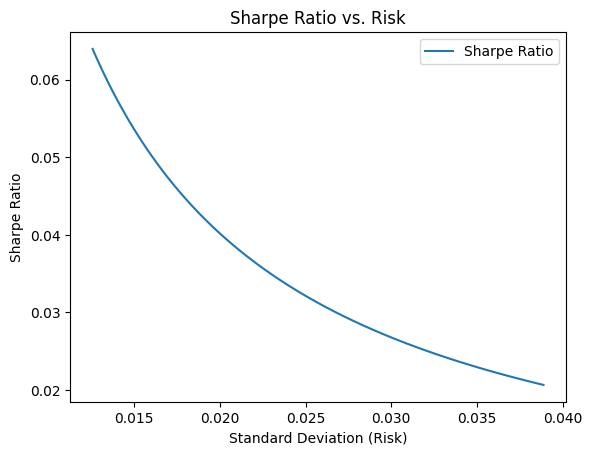

In [36]:
# Generate random data for illustration
risk_levels = np.linspace(min(volatility), max(volatility), 100)  # Replace with actual risk levels

# Calculate Sharpe ratios of AKER for each risk level
sharpe_ratios = [(expected_returns[0] - daily_rf_rate) / risk for risk in risk_levels]
print(sharpe_ratios)

# Plot the Sharpe ratio graph
plt.plot(risk_levels, sharpe_ratios, label='Sharpe Ratio')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio vs. Risk')
plt.legend()
plt.show()

To calculate our Sharpe ratio we firstly need to find our portfolio expected return and our portfolio standard deviation. For this task we need to apply some vector algebra. The portfolio expected return $E(r_p)$ wil naturally be the dot product of the expected return vector $\overline{X}$ and the portfolio weight vector $W$.
Expressed as: $$E(r_p) = \sum_{i=1}^n w_i * E(r_i)$$
or more simply with vectors as: $$W^T \cdot \overline{X}$$

The vectors being:
<br>
$$ W^T = \begin{bmatrix}
 w_{AKER}&
 w_{AKRBP}&
 \cdots &
 w_{YAR}
\end{bmatrix}
\
\overline{X} = \begin{bmatrix}
 E(r_{AKER})\\
 E(r_{AKRBP})\\
 \cdots \\
 E(r_{YAR})
\end{bmatrix}$$
<br>
Here we are required to use the transpose of the weight vector as matrix algebra requires the first matrix to have the same number of columns as the second has rows to correctly calculate the dot product.

For calculating our portfolio volatility we will need to combine matrix multiplication with vector algebra. By first using matrix multiplication on the covariance matrix $\sum{}$ and multiplying it by the portfolio weights $W$ we receive a column vector that measures how movements of each asset's return contribute to the overall covariance structure. By again multiplying this vector by the transposed portfolio weight vector $W^T$ we receive a scalar that equals our portfolio variance. Simply taking the square root of the variance leaves us with our portfolio volatility $\sigma_p$. The formula is as follows:

<br>

$$\sigma_p = \sqrt {W^T \cdot \sum{} \cdot W}$$

<br>


## $\textbf{2.1 Nonlinear programming}$
Nonlinear programming (NLP) is a mathematical method to achieve the best outcome (in our case maximizing the Sharpe ratio) in a mathematical model whose requirements are represented by nonlinear relationships. In contrast to linear programming (LP), where both the objective function and constraints are linear, NLP allows for more flexibility in modeling real-world problems where relationships are nonlinear, such as with the Sharpe ratio. The term "programming" in nonlinear programming doesn't refer to computer programming but rather to planning or scheduling. The key concepts of NLP are as follows:

1. Objective Function $f(x)$: This is the mathematical expression to be optimized,It is a mathematical expression that depends on the decision variables $x$. In NLP,
$f(x)$ is a nonlinear function. Here the Sharpe ratio formula.

2. Decision Variables $x$: Represent the values to be the determined by the algorithm, these are often subject to constraints. In our case these are the weights of each stock in the portfolio.

3. Constraints: These are restrictions and limitations on the decision variables, expressed as either inequality constraints $g_i(x) \leq 0$ or equality constraints $h_j(x) = 0$. Represent real-world limitations that allow us to apply NLP to solve issues.

4. Feasible Solution: This is the set of values that satisfy the system of constraints we input. These lie withing the feasible region defined by the constraints. Considering our problem contains 20 decision variables, it operates in 20 dimensions, therefore it will be difficult to visualize.

The goal of nonlinear programming is to find the values of the decision variables that optimize (maximize or minimize) the objective function while staying within the feasible region. (Bradley, 1977)




## $\textbf{2.2 Maximizing Sharpe Ratio}$
Since we wish to maximize the Sharpe ratio we can formulate the problem as follows:

<br>

$$max\ \frac{E(r_p)-r_{f\ daily}}{\sigma_p}$$
$$s.\ t.$$
$$\sum_{i=1}^n w_i = 1 for\ i \in \{AKER,...,YAR\} $$
$$0\leq w_i\leq1\ for\ i \in \{AKER,...,YAR\}$$


<br>

- $w_i$ represents the decision variables, the weights of each stock

- $\frac{E(r_p)-r_{f\ daily}}{\sigma_p}$ is the objective function to be maximized, the Sharpe ratio

- $\sum_{i=1}^n w_i = 1$ is the equality constraint that the decision variables are subject to. In our problem we require the weights of all the stocks to sum up to 100%, represented by the equality constraint, as we want a fully invested portfolio.

- Finally the inequality constraint $0\leq w_i\leq1\$. It assures that the weight of an individual stock cannot fall below 0, or exceed 1, as we do not allow short sales, that is the sale of "borrowed" stock, in our model, and we cannot invest more than 100% of our capital.   

There are several methods for solving a NLP problem. We have chosen Sequential Quadratic Programming as it handles constrained smooth problems well.

SQP starts with an initial guess for the portolio weights $w_i$ and setting an iteration counter to $k = 0$. The key idea behind SQP is to approximate the original optimization problem at each iteration by a simpler quadratic subproblem, a "shortcut", which is then solved to update the current solution. The process is repeated iteratively until convergence to an optimal solution is achieved. (Brown, 2009)

The "shortcut" is a quadratic approximation of the Lagrangian function based on the current values of $w_i$ and Lagrangian multiplication.

<br>

$$Q_k(d) = \frac{E(r_p)-r_{f\ daily}}{\sigma_p} - \sum_{i=1}^n\lambda_{i}^{(k)}(w_i+d_i-1) - \sum_{i=1}^n\mu_{i}^{(k)}(-w_i-d_i)$$

<br>

here $d_i$ is the change of weight in asset $i$, while $\lambda_{i}^{(k)}$ and $\mu_{i}^{(k)}$ are Lagrange multipliers.

We now solve the quadratic subproblem to obtain the changes in weights $d_i$ that maximizes the approximated problem subject to linearized constraints.

<br>

$$max_{d_{AKER},d_{AKRBP},\cdots,d_{YAR}}\ Q_k(d)$$

$$s.\ t$$
$$\sum_{i=1}^n (w_i+d_i) = 1$$
$$0\leq (w_i+d_i)\leq1\ $$

<br>

With calculations completed we simply update the portfolio weights by adding $d_{i,k}$ to $w_{i,k}$ and increment the iteration counter by $k+1$. Finally we check for convergence. If the convergence criteria are met we have found a solution, otherwise the process iterates and a new quadratic subproblem is formulated. Iterating over this process manually is a grand task and not something we can easily accomplish by ourselves.

To successfully solve this nonlinear programming problem we will therefore make use of the `scipy.optimize` library. We firstly define our objective function that accepts weights as a variable as formulated above. As the chosen library only supports minimization problems we will therefore have to minimize the negative Sharpe ratio to achieve our desired results. The problem is thus rather:

<br>

$$min\ -\frac{E(r_p)-r_{f\ daily}}{\sigma_p}$$
$$s.\ t.$$
$$\sum_{i=1}^n w_i = 1 for\ i \in \{AKER,...,YAR\} $$
$$0\leq w_i\leq1\ for\ i \in \{AKER,...,YAR\}$$

<br>

We then define the initial weights to solve for. We have the possibility to choose values arbitrarily, but setting equal starting weights for all stocks is in our mind objectively the choice that would mess least with the algorithm. Our `minimize` function accepts `bounds` as a parameter, therefore we can individually define the bounds to be between 0 and 1 and define the main constraint requiring the weights to sum up to 1 by itself. There are several methods in `scipy.optimize` for performing nonlinear programming. We have chosen the "SLSQP" (Sequential Least Squares Programming) method as it is the library specific implementation of the SQP method discussed earlier and has been widely used and tested as part of the `scipy` library. (Varoquaux, 2022)

In [37]:
# Objective function for optimization (negative Sharpe ratio)
def objective(weights):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - daily_rf_rate) / portfolio_std_dev
    return -sharpe_ratio

# Initial guess for weights
initial_weights = np.ones(len(expected_returns)) / len(expected_returns)

# Bounds for weights (between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(expected_returns)))

# Constraints for optimization (weights sum to 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Perform portfolio optimization
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
optimal_weights = result.x
optimal_portfolio_return = np.dot(optimal_weights, expected_returns)
optimal_portfolio_std_dev = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
#max_sharpe_ratio = (optimal_portfolio_return - daily_rf_rate) / optimal_portfolio_std_dev
max_sharpe_ratio = -result.fun
print(optimal_portfolio_return)
print(optimal_portfolio_std_dev)


0.0010279166760217902
0.01139799675041353


With our algorithm completing its job without errors, we are now ready to look at the results. We extract the optimal portfolio weights and the minimized (maximized) Sharpe ratio from the results, and calculate the respective portfolio return and volatility based on the earlier mentioned formulas. We would now like to present our findings in a clear manner that is easy to comprehend. We first create a DataFrame of the optimal stock weights via a `python` dictionary. Here we convert the weight values to percentages and round them down to two decimals for better readability. Further we observe from the results that several of the stocks receive miniscule weights that are irrelevant, this is an inherent flaw of such an algorithm in `python`. Therefore we set a tolerance limit of $0.00001$ and filter out all stocks with weights below this value.

<br>

In our calculations we have used daily price and return data from the last 10 years. More datapoints allow us to capture more of the movements in value and calculate variance and volatility more accurately. However when presenting such information it is more appropriate to use annual formatting. We use the formula for converting short rates to long:

<br>

$$E(r_p)_{annual} = (E(r_p)_{daily}+1)^{t}-1$$

<br>

The value for $t$ is once again $252$, accounting for the 252 trading days in a calendar year.

<br>

When annualizing standard deviation we are required to use a slightly adjusted formula, the rationale here is that, over time, the effects of random fluctuations tend to accumulate and the standard deviation increases at a square root rate. This is the case with the random walk theory, which is the most common assumption when discussing asset prices. Therefore, to account for the inherent nature of volatility the formula is as follows:

<br>

$$\sigma_{p\ annual} = \sigma_{p\ daily} * \sqrt t$$

<br>

Lastly we will calculate the annual Sharpe Ratio to complement our other annualized values and give an accurate representation of the risk-adjusted return given our investment horizon of 10 years.

In [38]:
# Creating a DataFrame to store allocation data
weight_data = {
    'Tickers': sorted(tickers),
    'Stocks': sorted(stock_names),
    'Optimal Weights (%)': (optimal_weights * 100).round(2),
    'Expected Return (%)': (expected_returns * 100).round(2),
    'Volatility (%)': (volatility * 100).round(2)
}
weight_df = pd.DataFrame(weight_data)

# Filter out stocks with zero optimal weights, sort by weights in descending order
weight_df_filtered = weight_df[abs(optimal_weights) > 0.00001]
weight_df_filtered = weight_df_filtered.sort_values(by='Optimal Weights (%)', ascending=False)

# Calculate annualized portfolio return and volatility
annualized_portfolio_return = ((optimal_portfolio_return + 1) ** 252 - 1) * 100
annualized_portfolio_volatility = (optimal_portfolio_std_dev * np.sqrt(252)) * 100

# Print the results with clear labels and units
print("\nOptimal Portfolio Allocation:")
print(weight_df_filtered.to_string(index=False))
print("\nAnnualized Portfolio Return: {:.2f}%".format(annualized_portfolio_return))
print("Annualized Portfolio Volatility: {:.2f}%".format(annualized_portfolio_volatility))
print("Sharpe Ratio: {:.2f}".format((annualized_portfolio_return-RF_RATE)/annualized_portfolio_volatility))


Optimal Portfolio Allocation:
 Tickers                    Stocks  Optimal Weights (%)  Expected Return (%)  Volatility (%)
BAKKA.OL            Bakkafrost P/F                18.79                 0.12            2.03
 SALM.OL                SalMar ASA                18.31                 0.13            2.10
  TOM.OL         Tomra Systems ASA                17.94                 0.10            2.04
  KOG.OL     Kongsberg Gruppen ASA                16.32                 0.08            1.80
  GJF.OL Gjensidige Forsikring ASA                 9.09                 0.07            1.32
 WAWI.OL  Wallenius Wilhelmsen ASA                 7.20                 0.11            2.65
AKRBP.OL               Aker BP ASA                 5.92                 0.10            2.69
SRBNK.OL   SpareBank 1 SR-Bank ASA                 5.36                 0.08            1.69
  FRO.OL             Frontline plc                 1.06                 0.08            3.89

Annualized Portfolio Return: 29.55%
An

The results give as an annual return of 29.55%, a risk level of 18.10%, and a relatively good Sharpe Ratio of 1.63. The optimized portfolio is a combination of high risk, high reward such as Aker BP and Wallenius Wilhelmsen as well as low risk, low reward stock such as Gjensidige Forsikring and Sparebank 1 SR-Bank. This seems to be in accordance with Modern Portfolio Theory. (Investopedia, 2023) We can also observe that the selected portfolio post-filtering only consists of 9 of the originally chosen 20 stocks.

We have to keep in mind as this is a NLP problem and the objective function may be non-convex that there might exist several local optima and the algorithm simply is stuck in one of them. Without further testing it is difficult for us to know whether we have arrived at the global optima. The algorithm may also be sensitive to the initial guesses for weights.



## $\textbf{2.3 Efficient Frontier and CML}$
We can take our model further by applying the same method to create an efficient frontier of optimal portfolios. The efficient frontier is a concept in portfolio theory that represents a set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return. The frontier itself is a graph or curve that plots various combinations of assets in a portfolio, illustrating the trade-off between risk and return. Each point on the curve represents a portfolio with a specific allocation of assets. The optimal portfolio with the highest Sharpe ratio we just calculated should be located along this curve.(Ganti, 2023)

The Capital Market Line is a tangent line drawn from the risk-free rate to the efficient frontier. It represents the optimal risk-return trade-off for a risk-free asset combined with a risky portfolio.(Ganti, 2022)

Though our optimized portfolio represents the combination of stocks giving the best risk-adjusted return, some investors might have a set risk tolerance. An efficient frontier allows them to choose a portfolio of stocks that corresponds to their desired level of risk while still maximizing relative return.

The math behind the efficient frontier is simply a continuation of our previous modelling. We will here again apply linear programming, with a couple small adjustments. When composing the efficient frontier we would like to iterate over a set number of target returns, here we generate a 100 points between the minimum and maximum expected return for our chosen stocks using the `linspace` command. Here we will be using the same objective function which maximizes the Sharpe ratio with the added constraint requiring the portfolio return, that is the dot product of the weight and expected return vectors, to equal the given target return. We will now formulate the new problem:
<br>
$$max\ \frac{E(r_p)-r_{f\ daily}}{\sigma_p}$$
$$s.\ t.$$
$$\sum_{i=1}^n w_i = 1$$
$$\sum_{i=1}^n w_i * E(r_i) = target\ return$$
$$0\leq w_i\leq1\ for\ i = 1, 2,...,n$$
<br>
Our code iterates over our list of target returns using a loop, giving us two lists of portfolio returns and their respective volatilities. We can plot the efficient frontier curve with volatility along the x-axis and the corresponding return along the y-axis. In addition we generate a number of portfolios with random weights for each stock. These portfolios concentrate in a cloud and help us to visualize the approximate distribution of $n$ random portfolios as a supplement to the efficient frontier.

Lastly we have the Capital Market Line. The Capital Market Line is a tangent line drawn from the risk-free rate of return to the point where it intersects with the Efficient Frontier. The CML shows the optimal risk-return trade-off available to investors in the market when combining a risk-free asset with a risky portfolio. The point where the CML intercepts the efficient frontier should in theory be the optimal portfolio we calculated, this being the most efficient portfolio when taking into account risk-adjusted return indicated by the Sharpe ratio.
The formula for the CML is as follows:
$$E(r_p) = R_f + \frac{E(r_m)-R_f}{\sigma_m}*\sigma_p$$
Here $E(r_m)$ and $\sigma_m$ represent respectively the expected return and volatility of the market portfolio. In our case the market portfolio is the optimal portfolio we calculated in the previous part. When taking this into account we can observe that $\frac{E(r_m)-R_f}{\sigma_m}$ is simply the formula for the maximum Sharpe Ratio for our collection of stocks. As such the CML is a linear function of the maximized Sharpe Ratio and the portfolio volatility. To plot our function we do some simple algebra to calculate a column vector for the portfolio volatilities corresponding to the returns ranging from the minimum to the maximum on the efficient frontier.

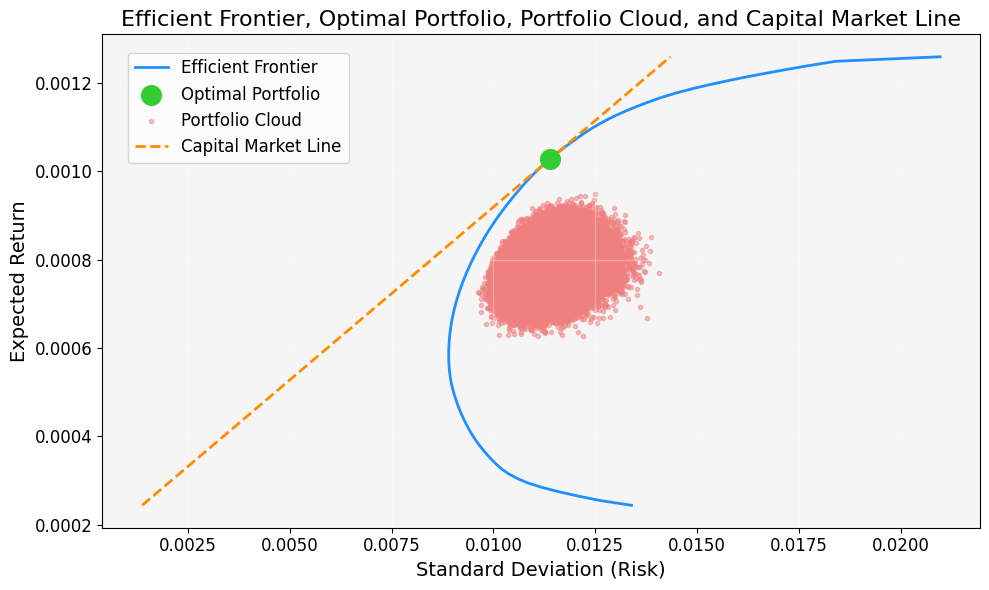

In [39]:
# List of target returns for Efficient Frontier
target_returns = np.linspace(min(expected_returns), max(expected_returns), 100)

# Empty lists to store results
efficient_std_dev = []
efficient_returns = []

# Calculate efficient portfolios for different target returns
for target_return in target_returns:
    # Constraint: target return should be at least equal to the given value
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: np.dot(weights, expected_returns) - target_return})

    # Perform portfolio optimization
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    # Calculate standard deviation for the optimized portfolio
    efficient_std_dev.append(np.sqrt(np.dot(result.x.T, np.dot(cov_matrix, result.x))))
    efficient_returns.append(target_return)

# Generate random portfolios for the portfolio cloud
num_portfolios = 500000
random_portfolios = []
for _ in range(num_portfolios):
    random_weights = np.random.rand(len(tickers))
    random_weights /= random_weights.sum()  # Ensure the weights sum up to 1
    random_portfolio_return = np.dot(random_weights, expected_returns)
    random_portfolio_std_dev = np.sqrt(np.dot(random_weights.T, np.dot(cov_matrix, random_weights)))
    random_portfolios.append([random_portfolio_std_dev, random_portfolio_return])

# Calculate Capital Market Line (CML)
cml_returns = np.linspace(min(efficient_returns), max(efficient_returns), 100)
cml_std_dev = (cml_returns - daily_rf_rate) / max_sharpe_ratio

# Convert lists to numpy arrays
efficient_std_dev = np.array(efficient_std_dev)
efficient_returns = np.array(efficient_returns)
random_portfolios = np.array(random_portfolios)

# Plot the Efficient Frontier, Optimal Portfolio, Portfolio Cloud, and Capital Market Line
plt.figure(figsize=(10, 6))

plt.plot(efficient_std_dev, efficient_returns, color='dodgerblue', linewidth=2, label='Efficient Frontier')
plt.scatter(optimal_portfolio_std_dev, optimal_portfolio_return, color='limegreen', marker='o', s=200, label='Optimal Portfolio', zorder=5)
plt.scatter(random_portfolios[:, 0], random_portfolios[:, 1], color='lightcoral', marker='.', alpha=0.5, label='Portfolio Cloud', zorder=1)
plt.plot(cml_std_dev, cml_returns, color='darkorange', linestyle='--', linewidth=2, label='Capital Market Line')

plt.title('Efficient Frontier, Optimal Portfolio, Portfolio Cloud, and Capital Market Line', fontsize=16)
plt.xlabel('Standard Deviation (Risk)', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
plt.legend(fontsize=12, loc='upper left', shadow=True)

plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='white', linestyle='-', linewidth=1, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(fontsize=12, loc='upper left', framealpha=0.8)
legend.set_bbox_to_anchor((0.02, 0.98))

plt.tight_layout()
plt.show()

In our plot we can observe the Efficient Frontier, the Optimal Portfolio, the CML and the Portfolio Cloud. Everything seems to be in accordance to theory. The Optimal Portfolio is correctly the tangent of the CML and the Efficient Frontier showcasing the optimal investment strategy. The Portfolio Cloud is concentrated further away from the Efficient Frontier. This results from the fact that the weighting of the 20 stocks in the portfolios is randomly generated and therefore contains a value for each stock. Based on our optimization model based on we arrived at a portfolio that only consists of 9 of the 20 stocks, therefore it makes sense that the Portfolio Cloud which always contains some combination of all 20 stocks doesn't align with the Efficient Frontier.


<br>

## $\textbf{2.4 Creating an index}$

To analyse the data further we need to create an array containing the stocks. We will perform matrix multiplication between the stocks we have chosen and their respective weights. Since the weights are a one dimensional array there is no need to transpose. The output will be a one dimensional array with the length of the number of observations. The index will be used to both forecast and in the time series analysis.

In [40]:
# Selecting stock prices for specific stocks
stocks = weight_df_filtered['Tickers'].tolist()
my_port = data[stocks]

# Assuming the weights are in the 'weights' variable within 'weight_df_filtered'
weights = weight_df_filtered['Optimal Weights (%)'].values / 100  # Converting the weights to a NumPy array

# Multiplying the stock prices and the optimal weights using matrix multiplication
weighted_sum = np.dot(my_port.values, weights)
index = weighted_sum
# Creating theYof the index
y = index

# $\textbf{3. Forecasting with differential equations}$

Kloeden and Platen have a chapter about stochastic differential equations(Kloeden & Platen, 1992). We will use nonlinear regression to forecast the future prices for our weighted index. We are using standard deviation and estimated return, the parameters that maximizes the sharp ratio estimated in the portofolio optimization. To solve the equation we are using a numerical methid called Eulers method.

<br>

We are using the Wiener process which is a continuous-time stochastic process $W(t)$ for t larger than than $0$ and the the time increment is Gaussian with $mean \ 0$ and $ variance_{t-s} $ (Weisstein, 2023). This property of variance being proportional to the length of the time interval is a key characteristic of the increments of a Wiener process. The last characteristic is that the increments for nonoverlapping time intervals are independent. The future values needs to be independent from the ones predicted. We will use the Brownian motion, a random walk with random stepwise sizes, which is the most common precedure.

<br>

- The deterministic parameter in our equation is the drift component which is the optimal portifolio return (mu) we calculated earlier (Chen, 2020).

- The stochastic randomness is the diffusion which is the optimal standard deviation from our portifolio optimization (sigma)(Mitchell, 2022). This is the momentum of the stocks from day to day.

<br>

$\text{Let's consider a stochastic differential equation (SDE) given by:}$

<br>

$$
dX(t) = \mu X(t) dt + \sigma X(t) dW(t)
$$

$\text{where:}$
- $\text{where $ dX(t)$ is the change in the process at time \(t\),}$
- $\text{$\mu$ is the drift coefficient (average rate of change of the process),}$
- $\text{$\sigma$ is the diffusion coefficient (volatility),}$
- $\text{$ X(t)$ is the value of the process at time \(t\),}$
- $\text{$dt$ is the time increment,
- \(dW(t)\) is the increment of a Wiener process (Brownian motion).}
$

<br>

To solve our differential equation we will use "Eulers Method", which was first described by Leonhard Euler in the 18th century (Hervik, 2023).The Euler method is often used for numerical simulation of SDEs. The method consists of choosing an initialvalue $X0$ and a steplenght $dt = t[1] - t[0]$.

$\text{Here is a basic implementation:}$

$$
\text{X}[j, i] = \text{X}[j, i-1] + \mu \times \text{X}[j, i-1] \times dt + \sigma \times \text{X}[j, i-1] \times dW
$$

<br>

This line of code represents an iteration step in the Euler method for simulating the SDE. The simulation updates the values based on both the deterministic and stochastic components at each time step.

$\text{Where: }$
- $ \mu \times \text{X}[j, i-1] \times dt $: Represents the deterministic component (the drift)
- $\sigma \times \text{X}[j, i-1] \times dW$: Represents the stochastic component(the diffusion)

<br>



## $\textbf{3.2 Setting the parameters} $

<br>

We can adjust the number of trading days but since the future is much uncertain we are forecasting the next 500 trading days or two years.

In [41]:
# Setting the parameters for the simulation
mu_est = optimal_portfolio_return
sigma_est = optimal_portfolio_std_dev

# Setting the number of trading days we want to forecast in the future
num_days = 500
# Creating a array of days
t = np.arange(num_days)

# Number of simulations you want to perform
num_simulations = 10

# Setting the last day of the time series as the initial stock price
X0 = y[2509]

# Calculating the time increment (delta t)
dt = t[1] - t[0]

# Determining the number of time steps (N)
N = len(t)

## $\textbf{3.2 The Eulers Method} $

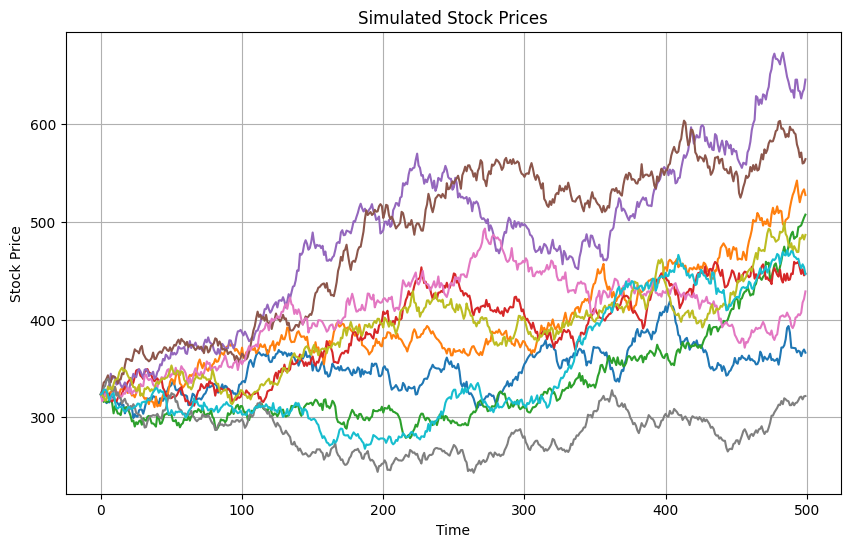

In [42]:
# Creating an empty array to store the simulated stock price paths
simulations = np.zeros((num_simulations, N))

# Initializing the first value of each simulation path with the initial stock price (X0)
simulations[:, 0] = X0

# Generating multiple paths for stock prices
for j in range(num_simulations):
    for i in range(1, N):
        # Generating a random value from a normal distribution (Brownian motion)
        dW = np.random.normal(0, np.sqrt(dt))

        # Simulating the stock price path using the stochastic differential equation (SDE)
        simulations[j, i] = simulations[j, i-1] + mu_est * simulations[j, i-1] * dt + sigma_est * simulations[j, i-1] * dW

# Plotting
plt.figure(figsize=(10, 6))
# Plot multiple individual simulated paths
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Simulation {i + 1}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Prices')
plt.grid()
plt.show()

The x-axis represents time, ranging from 0 to 500 and the y-axis represents the stock price, ranging from 100 to 750.Each line of a different color (red, green, orange, purple, blue, etc.) represents a different simulation of stock prices.

Trend: Most of the lines show an upward trend, indicating that the stock price is expected to increase over time in most simulations. This suggests a positive outlook for the stock’s future performance.

Volatility: The lines vary in their degree of volatility, with some showing more fluctuations than others. This represents the uncertainty in the stock’s future price. Stocks with higher volatility have greater potential for both gains and losses.

Divergence: All lines start at the same point but diverge as time progresses. This divergence represents the increasing uncertainty as we project further into the future. The wider the range of paths, the greater the uncertainty about the stock’s future price.

Range of Outcomes: The range of outcomes, from the lowest to the highest at the end of the time period, gives an indication of the potential best and worst-case scenarios for the stock price.

## $\textbf{3.3 The Average Forecast} $

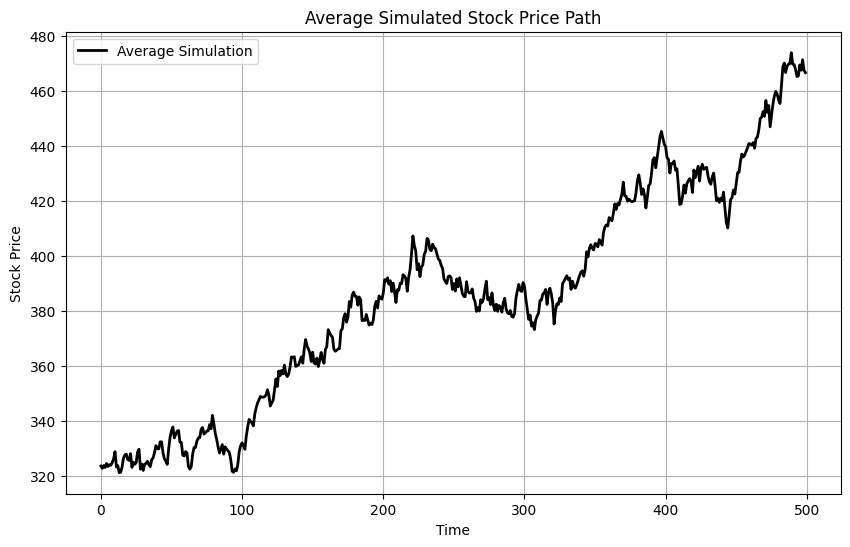

In [43]:
# Calculating the average of the simulations
average_simulation = np.median(simulations, axis=0)

# Plotting the average simulation
plt.figure(figsize=(10, 6))
plt.plot(average_simulation, label='Average Simulation', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average Simulated Stock Price Path')
plt.grid()
plt.legend()
plt.show()


This plot shows the median value of the simulated stock prices at each point in time. This is often used as a measure of the central tendency of the simulations. The line shows a general increase in stock price over time, starting at a stock price of just above 200 and ending over 500. This suggests a positive outlook for the stock’s future performance based on these simulations.

<br>


# $\textbf{4. Time Series Analysis}$

<br>

In this part we are going to analyse our index (portifolio) by visulizing the different components of our time series. Time series consists of four components in our analysis: trend, seasonality, cycles, and residuals(Shmueli et al., 2019). We are focusing on a single time series, the weighted average price of our optimal portifolio. The problem with a single time series is that we exclude potential relationships between the components (stocks) of the series.

<br>
<br>

#### $\textbf{Decomposing the series:}$

<br>

$y_t = T_t * S_t * C_t * R_t$

- $y_t$: represents the original time series at time
- $T_t$: denotes the trend component at time $t$, capturing the long-term behavior or trend in the data.
- $S_t$: stands for the seasonality component at time $t$, which accounts for the periodic or recurring patterns within the time series.
- $C_t$: Represents the cyclic behaviour
- $R_t$: signifies the remainder component or residuals at time $t$, encompassing everything not explained by the trend and seasonality.

## $\textbf{4.1 Trend}$

<br>

Trend is the change in the series from one period to the next. To identify trends its useful to scale of the series. When we transfer to a sigmoid function we can see if the fucntion has a exponential or a linear trend. Another way to identify trends is to supress the seasonality, which can be done by using the moving average. Different types of trends is linear, exponential and polynomial.

<br>

$$\hat{y} = X*\beta + \epsilon $$

<br>

$$\hat{y} = np.dot(X,\ Betas)$$

<br>

Here is how we are calculating the beta coeffisients through matrix multiplication. First we get the inverse of the matrix by multiplying with the transposed. Then we multiply the inverse with the X matrix and part is to multiply this product with the index values. To show the math on how we can calculate the inverse i will take a simpel matrice with the first three rows from our X matrix. We will show the mathematics behind the beta values:

<br>

$$\hat{\beta} = (((X^{T}*X)^{-1}) X^T )*Y $$

<br>

$$
X^{T} \begin{bmatrix} 1 & 1 & \dots & 1 \\ x_{1}^2 & x_{2}^2 & \dots & x_{n}^2 \end{bmatrix}
$$

<br>

$$
X = \begin{bmatrix} 1 & x_{1}^2 \\ 1 & x_{2}^2 \\ \vdots & \vdots \\ 1 & x_{n}^2 \end{bmatrix}
$$

<br>

$$ (X^{T}*X)^{-1} = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 4 & 9 \end{bmatrix} \times \begin{bmatrix} 1 & 1 \\ 1 & 4 \\ 1 & 9 \end{bmatrix}
$$

<br>

$$
Inverse = (X^{T}*X)^{-1} = (\begin{bmatrix} 3 & 14 \\ 14 & 98 \end{bmatrix})^{-1}
$$

<br>

Next step is to calculate the inverse by Gaussian eliminination. I will refer to the first row as R1 and row 2 as R2, and i will show the changes i do to each rows as single matrices. This is our starting point, we will make changes to the left part:

<br>

\begin{array}{cc|cc}
3 & 14 & 1 & 0 \\
14 & 98 & 0 & 1 \\
\end{array}

<br>

First step: $ R_{1} * 1/3 $

\begin{array}{cc|cc}
1 & 14/3 & 1/3 & 0 \\
0 & 98 & -3 & 14 \\
\end{array}

<br>

Second step: $ R_{2} = R_{1} * -14  $

\begin{array}{cc|cc}
1 & 14/3 & 1/3 & 0 \\
0 & 98/3 & -14/3 & 1 \\
\end{array}

<br>

Third step: $ R_{1} = R_{2} * -1/7  $

\begin{array}{cc|cc}
1 & 0 & 1 & -1/7 \\
0 & 98/3 & -14/3 & 1 \\
\end{array}

<br>

Fourth step: $ R_{2} = R_{2} * 3/98  $

\begin{array}{cc|cc}
1 & 0 & 1 & -1/7 \\
0 & 1 & -1/7 & 3/98 \\
\end{array}

<br>

We then multiply the inverse with the transposed:

<br>

<br>


$$
(X^{T}*X)^{-1} * X^{T} =
\begin{bmatrix}
1 & -1/7 \\
-1/7 & 3/98 \\
\end{bmatrix} \times \begin{bmatrix} 1 & 1 & 1 \\ 1 & 4 & 9 \end{bmatrix} = \begin{bmatrix} 0.86 & 0.43 & -0.29 \\ -0.11 & -0.02 & 0.13 \end{bmatrix}
$$

<br>


<br>

$$
\hat{\beta} = (((X^{T}*X)^{-1}) X^T )*Y = \begin{bmatrix} 0.86 & 0.43 & -0.29 \\ -0.11 & -0.02 & 0.13 \end{bmatrix} \times \begin{bmatrix}
30.93 \\
30.72 \\
30.69 \\
\end{bmatrix} = \begin{bmatrix} 3.09 \\ -2.76 \end{bmatrix}
$$

<br>

This is a simplification of the algorithm that the numpy library enforces us with. The real values beta values we get from the function is:

<br>

$$
\hat{\beta} = (((X^{T}*X)^{-1}) X^T )*Y = \begin{bmatrix} 65.55 \\ 0.000054 \end{bmatrix}
$$

<br>

We then pick up our function to calculate the Y-values:

<br>
$$\hat{y} = X*\beta + \epsilon $$

<br>

$$ \begin{bmatrix} y_1 \\ y_2 \\ ... \\ y_i \end{bmatrix} = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\...& ... \\x_{ij} & x_{ij} \end{bmatrix} * \begin{bmatrix} \beta_1 \\ \beta_2 \end{bmatrix} + \begin{bmatrix} ϵ_1 \\ ϵ_2 \\... \\ ϵ_i \end{bmatrix}$$

<br>
<br>

$$\hat{y}_2 = 1* (65.55) + 4 * (0.000054) + \epsilon $$

<br>

$$\hat{y}_2 \approx 65.55 + \epsilon $$

<br>
<br>

There is almost no change in the first y value, but since the increase is exponential the changes will occcour later on.

In [44]:
# Creating a linear array of the numbers from 1 to 2510
lin_trend = np.arange(1,len(index)+1,1)
# Making an exponential trend of the linear trend
quad_trend = lin_trend**2

# Creating an array of ones for the constant term
const_term = np.ones_like(lin_trend)
# Create a matrix 'x' with a constant term and quadratic trend
X = np.column_stack((const_term, quad_trend))

# Direct least square regression
betas = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y)
print(betas)

# trend = y_hat
trend = np.dot(X, betas)

[6.55439059e+01 5.43643943e-05]


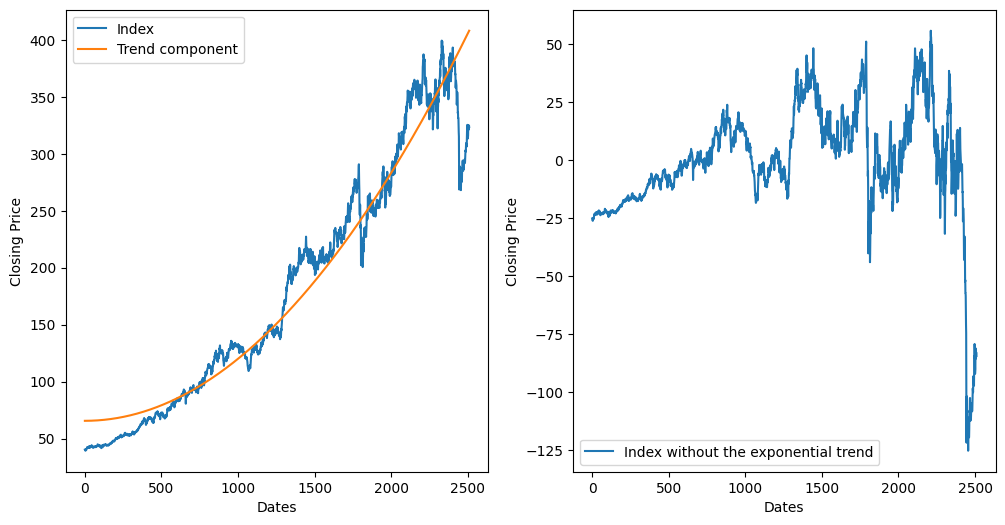

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# series - trend = seasonal + cycles + residuals
seasonal_c_r = y - trend

# Plotting the different subplots
axs[0].plot(y, label='Index')
axs[0].plot(trend, label='Trend component')
axs[0].set_xlabel('Dates')
axs[0].set_ylabel('Closing Price')
axs[0].legend()

axs[1].plot(seasonal_c_r, label='Index without the exponential trend')
axs[1].set_xlabel('Dates')
axs[1].set_ylabel('Closing Price')
axs[1].legend()



<br>

The trend can be explained by compound interest, it implies that the growth or change in the index over time follows a pattern similar to compound interest, where the value of an index grows exponentially over time.

## $\textbf{4.3 Seasonality}$

<br>

Seasonality describes a short-term cyclic behaviour of the series which can be observed several times within the given series. If there is a seasonal pattern, periods that fall in some seasons will have consistently higher or lower values that those values that fall in other seasons. This can be day-of-week, monthly, quarterly or yearly patterns in the data(Shmueli et al., 2019, p.429).
To find the seasonality in the data we can find the frequencies in the signal that matches the frequencies in the time series. The
<br>

 $$ frequency = \frac{sampling \ rate}{number \ of \ samplings} $$

<br>

$$ frecuencies = \frac{np.arange(len(Index)}{number \ of \ samplings} = \left[ \frac{1}{2510}, \frac{2}{2510}, \frac{3}{2510}, \dots, \frac{2510}{2510} \right ]$$

<br>

The frequencies will be used to find the peak frequency in our signal (Index).
The peak frequency within a time series characterizesas the frequency that exhibits the highest amplitude in the frequency domain (Peak frequency - Glossary of Meteorology, 2023).

<br>

In [46]:
# setting the lenght of the time series as the time component
N = len(seasonal_c_r)
n = np.arange(N)

# Sampling rate
sr = 1

T = N/sr

# freq = n/T

# Sampling interval
ts = 1/sr

# Frequncies
freq = fftfreq(N, ts)

In [47]:
# setting the lenght of the time series as the time component

# Samling interval equals 1
sampling_rate = 1

# Returning the frequencies for each day
frequencies = N / (n * sampling_rate)
frequencies

<ipython-input-47-da3ff36203d1>:7: RuntimeWarning: divide by zero encountered in divide
  frequencies = N / (n * sampling_rate)


array([           inf, 2.51000000e+03, 1.25500000e+03, ...,
       1.00119665e+00, 1.00079745e+00, 1.00039857e+00])


<br>

### $\textbf{4.3.1 Discrete Fourier Transform}$

<br>

To determine the peak frequency within a time series, the data is typically transformed from the time domain to the frequency domain using methods like the Fast Fourier Transform (FFT). The FFT function from the numpy liberary disassembles the time series into its constituent sinusoidal components, each associated with a specific frequency(numpy.fft.fft — NumPy v1.26 Manual, 2023). The algorithm converts the signals from time domains to frequency domains.The frequency that exhibits the highest amplitude in this transformation is identified as the peak frequency. The inverse of this frequency gives ut the estimated lenght of the seasons.

<br>

#### The equation for fast fourier transform (Weisstein, 2023):

<br>

$$ X(k) = \sum^{N-1}_{n=0}x(n)*e^{-2j\pi kn/N} $$

<br>

- X is the resulting frequncy domain vector (complex amplitudes at different frequencies).
- x is the time-domain signal
- W is the DFT matrix which contains of values from the fast fourier transformation.

<br>

Discrete Fourier Transform(DFT) is an transformation matrix which can be applied to a signal trough matrix multiplication. (Tabago, 2021). The frequencies of the signal from the FFT transformation is is multiplied with the signal (our weighted index).

<br>

#### The equation can be written as:
$$ X(k) = W*x(n) $$

<br>

$$N = 2510$$

$$ x(n) = [x_0, x_1, x_2, ..., x_{2510-1}, x_{N-1}]$$

<br>

#### The matrix multiplication can be expressed as:

<br>

$$
\text{x = seasonal_c_r} = \begin{bmatrix}
    x_0 \\
    x_1 \\
    \vdots \\
    x_{n-1}
\end{bmatrix}
$$

<br>

$$
\text{X} = \text{fft(seasonal_c_r)} = \begin{bmatrix}
    \omega_0^0 & \omega_0^1 & \dots & \omega_0^{n-1} \\
    \omega_1^0 & \omega_1^1 & \dots & \omega_1^{n-1} \\
    \vdots & \vdots & \ddots & \vdots \\
    \omega_{k-1}^0 & \omega_{k-1}^1 & \dots & \omega_{k-1}^{n-1}
\end{bmatrix}
$$

<br>

#### Where:

- $k$ represents the number of frequencies (rows).
<br>
- $n$ represents the number of samples in the data (columns)
<br>
- $\omega_k^n $ represents the \(n\)th element of the \(k\)th row of the DFT matrix.

<br>

#### Then, the calculation of dft_result using matrix multiplication is:

<br>

$$
\text{dft_result} = \text{np.dot}(\text{seasonal_c_r}, \text{dft_matrix}) = \begin{bmatrix}
    \text{seasonal_c_r} \times \text{1st row of dft_matrix} \\
    \text{seasonal_c_r}  \times  \text{2nd row of dft_matrix} \\
    \vdots \\
    \text{seasonal_c_r}  \times  \text{last row of dft_matrix}
\end{bmatrix}
$$

<br>

In [82]:
def DFT(x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

In [83]:
X = DFT(seasonal_c_r)

In [84]:
def make_sin_data(X):
    num_points = len(X)  # Du kan justere antallet punkter for å få ønsket glatthet i kurvene
    amplitudes = []
    phases = []
    # Gå gjennom hvert komplekse tall i X for å generere og plotte sinusfunksjonen for hver frekvens
    plt.figure(figsize=(12, 6))
    for x in X[:10]:
        amplitude = np.abs(x)  # Amplituden er størrelsen til det komplekse tallet
        amplitudes.append(amplitude)
        phase = np.angle(x)  # Fasen er vinkelen til det komplekse tallet
        phases += phase

        # Generer x-aksen
        t = np.linspace(0, 2*np.pi, num_points)  # Her antas det at sinusoiden er én periode

        # Beregn sinusoiden med amplituden og fasen for det gjeldende komplekse tallet
        sin_wave = amplitude * np.sin(t + phase)

        plt.plot(t, sin_wave)



    plt.xlabel('Tiden det tar rundt en sirkel')
    plt.ylabel('Amplituden')
    plt.title('Sinus kurver for de 10 første frekvensene')
    plt.grid(True)
    plt.show()

    return amplitudes, phases

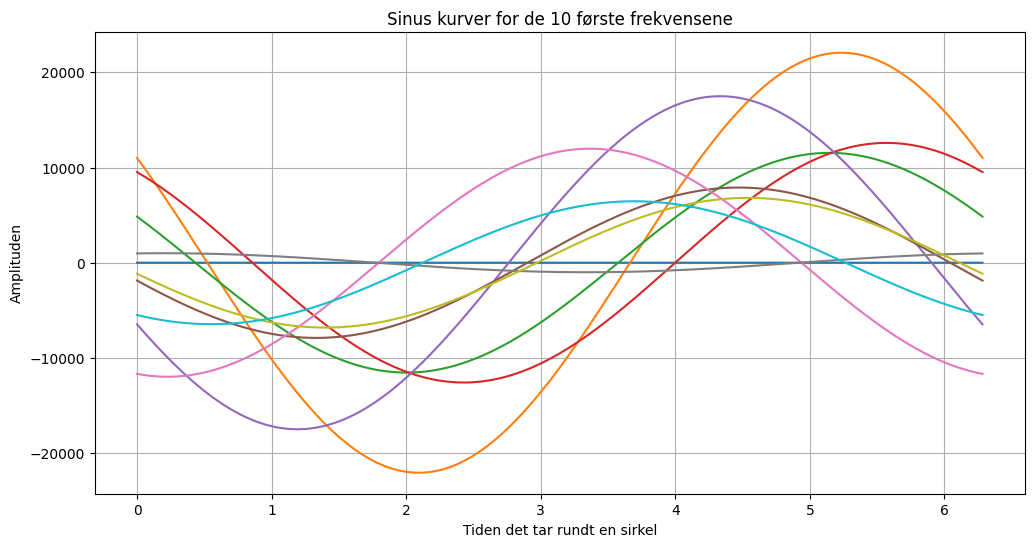

In [50]:
sin_data = make_sin_data(X)

### $ \textbf{4.3.2 Visualization of the seasonality} $

<br>

A periodogram is used to identify the dominant periods (or frequencies) of a time series. This can be a helpful tool for identifying the dominant cyclical behavior in a series, particularly when the cycles are not related to the commonly encountered monthly or quarterly seasonality(6.1 The Periodogram | STAT 510, 2023).

The dominant frequencies in the time series data is concentrated between 0  and 0.00025 cycles per year. This indicates that the main variation or the patterns in the data occur at very low frequencies, suggesting changes over longer periods. We found that the estimated peak period is seven years, the dynamics of the data persists over extendes periods and it indicates slower changes in the data.

<br>

<ipython-input-85-55c850b7ca9f>:23: RuntimeWarning: divide by zero encountered in divide
  f_d = 1/f_oneside / (sr)


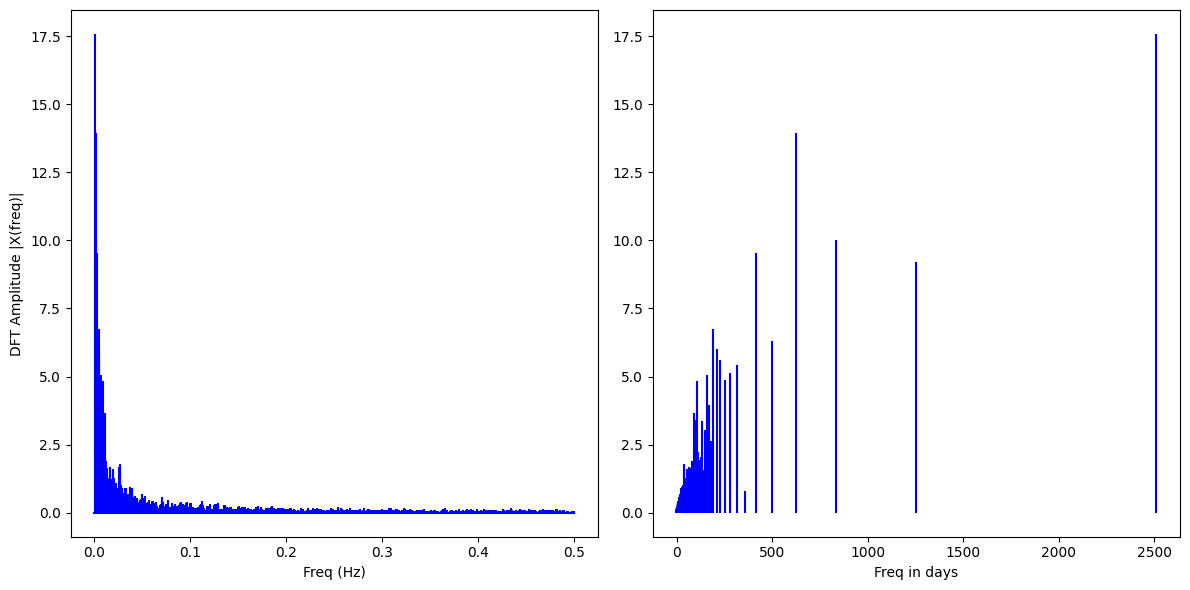

In [85]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside
# X_oneside = X_oneside[1:] + 1

# Finding the amplitudes
amplitudes = np.abs(X_oneside)
# Finding the phases
phases = np.angle(X_oneside)

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(f_oneside, amplitudes, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

# convert frequency to days
f_d = 1/f_oneside / (sr)

plt.subplot(122)
plt.stem(f_d, amplitudes, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq in days')
plt.tight_layout()
plt.show()

In [86]:
# Calculate the absolute values of the DFT coefficients to determine the dominant frequencies within the data
max_amplitude_index = np.argmax(amplitudes[1:])+1

# We find the frequency that matches the maximum amplitude in our time series
peak_freq = f_oneside[max_amplitude_index]

# Finding the max amplitude corresponding to index
max_amplitude = amplitudes[max_amplitude_index]

# Calulating the estimated period of the signal by taking the inverse of the peak frequncy
period = 1 / peak_freq
complex_func = X_oneside[max_amplitude_index]

print('Complex number: ', complex_func)
print('Index of the max ampltiude: ', max_amplitude_index)
print("Corresponding maximum amplitude: ", max_amplitude)
print("Peak frequenzy in Hz:", peak_freq)
print('Period: ', int(period))

Complex number:  (-15.231460108569143+8.772930988875194j)
Index of the max ampltiude:  1
Corresponding maximum amplitude:  17.577306254784883
Peak frequenzy in Hz: 0.00039840637450199205
Period:  2510


#### Summary:
- In the frequency domain representation of a time series, each bin corresponds to a specific frequency. The lowest bin (often starting at 0 Hz) represents the DC component or the average value of the time series. Each subsequent bin represents higher frequencies, up to the Nyquist frequency, which is half the sampling rate(«Nyquist Frequency», 2015). This is a important concept in  signal processing and forms the basis for techniques like the Fast Fourier Transform (FFT). The ability to examine the frequency domain is a powerful tool for understanding cyclical patterns and periodic behavior in time series data.

<br>

- The dominant frequencies are the ones that have the highest amplitudes after applying the Fourier Transform to the time series data. These frequencies contribute the most to the time series pattern.

<br>

- The peak frequency is the frequency with the highest amplitude in the frequency domain. Frequency domain displays how much the signal exists within the a given frequency bins (Time Domain Analysis vs Frequency Domain Analysis, 2022).  

<br>

- The inverse of the peak frequency is the peak period, which gives us the length of the sin wave (Frequency & Period, 2023). Our sin wave has a length of 2510 trading days which indicates the periods between the peaks in the data. If we divide the length by a year (365 days) we get almost seven years. This suggests that the dominant frequency component is corresponding to a seven years long period.

### $ \textbf{Sinusfit without least square regression} $

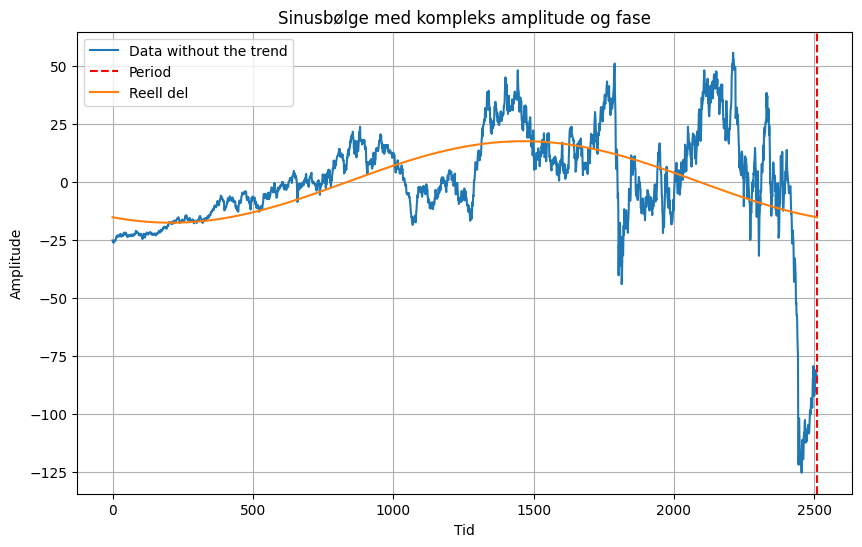

In [87]:
#Creating an function for making curves

def create_sin (peak_freq, complex_func, data, n):
    frekvens = peak_freq
    amplitude = np.abs(complex_func)
    fase = np.angle(complex_func)
    offset = np.mean(data)

    sinwave = amplitude * np.exp(1j * (2 * np.pi * frekvens * n + fase)) + offset

    return sinwave

sinwave = create_sin (peak_freq, complex_func, seasonal_c_r, n)

# Plott sinusbølgen
plt.figure(figsize=(10, 6))
plt.plot(seasonal_c_r, label='Data without the trend')
plt.axvline(x=period, color='red', linestyle='--', label='Period')
# plt.plot(f_d, amplitudes)
plt.plot(n, sinwave.real, label='Reell del')
# plt.plot(n, sinwave.imag, label='Imaginær del')

plt.xlabel('Tid')
plt.ylabel('Amplitude')
plt.title('Sinusbølge med kompleks amplitude og fase')
plt.legend()
plt.grid(True)
plt.show()

### $\textbf{4.3.3 Optimizing the sinusoid wave with Least Square Regression}$

The process of making the optimazation is picked up from a forum called Stack Overflow (Vasco, 2014). The following coding is a optimzation based on a sin function, the lenght of the time series, the index, and the parameters needed to create the sin function.    

In [88]:
def fit_sin(n, data, period, complex_func):
    guess_freq = 2 * np.pi / period
    guess_amplitude = np.abs(complex_func)
    guess_phase = np.angle(complex_func)
    guess_offset = np.mean(data)

    guess_param = [guess_freq, guess_amplitude, guess_phase, guess_offset]

    # Sinus function to be fitted with the parameters
    def sin_func(n, freq, amplitude, phase, offset):
        return np.sin(n * freq + phase) * amplitude + offset

    # scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
    fit = curve_fit(sin_func, n, data, p0=guess_param)

    optimized_params = fit[0]

    # Assumes ydata = f(xdata, *params) + eps.
    fitted_sin = sin_func(n, *optimized_params)

    # Finn indeksene til maksimalverdiene (toppene)
    peak_indices = np.where((fitted_sin[:-2] < fitted_sin[1:-1]) & (fitted_sin[1:-1] > fitted_sin[2:]))[0] + 1
    peaks_x = n[peak_indices]
    peaks_y = fitted_sin[peak_indices]

    # Beregn perioden mellom topper (avstanden mellom de to første toppene)
    # est_period = peaks_x[1] - peaks_x[0]

    # Finn indekser for topper i dataene
    # peaks_indices, _ = find_peaks(fitted_sin)

    # # Hent x- og y-verdier for toppene
    # peaks_x = n[peaks_indices]
    # peaks_y = data[peaks_indices]

    # Vis perioden mellom topper
    # print(f"Perioden mellom topper: {est_period}")

    return fitted_sin, fit, peaks_x, peaks_y

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


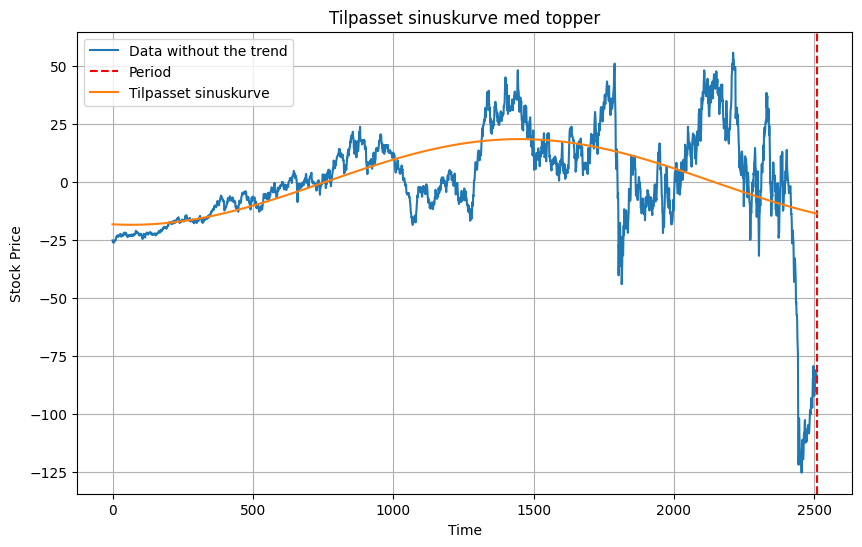

In [89]:
fitted_sin, fit, peaks_x, peaks_y = fit_sin(n, seasonal_c_r, period, complex_func)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(seasonal_c_r, label='Data without the trend')
plt.axvline(x=period, color='red', linestyle='--', label='Period')
# plt.plot(f_d, amplitudes)

plt.plot(n, fitted_sin, label='Tilpasset sinuskurve')
# plt.scatter(peaks_x, peaks_y, color='red', label='Topper')
# plt.scatter(peaks_x_f, peaks_y_f, color='red', label='Topper')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.title('Tilpasset sinuskurve med topper')
plt.show()

In [90]:
mape = np.mean(np.abs(fitted_sin - seasonal_c_r) / np.abs(seasonal_c_r))
print('MAPE: ' + str(mape))

MAPE: 2.8046361113988785


The sinusoid wave has a length of 2510 trading days and within the observed period of 2510 trading days we have 1 peaks and no valleys. A wave cycles is a wave's peak to peak (What Is a Cycle in a Wave?, 2022). In this case, the entire period of the data appears to capture a single cycle of the wave, indicating relatively low-frequency variation or slow changes over time. The sinusoid function has 2.18 % error rate which is quite good, since the error calculation coniders the amplitude, frequency, and phase of the sine wave.

Our function was not able to find a seasonal pattern in the data. When a time series dataset doesn't exhibit seasonal patterns, it implies that there's no regular, repeating behavior occurring at specific intervals within the data. The absence of seasonal patterns in a time series dataset doesn't mean a lack of patterns altogether. It shifts the focus to identifying and understanding broader trends, cyclic behaviors, and irregular variations that might not follow the typical seasonal fluctuations.


## $\textbf{4.4 Cycles}$

<br>

The cyclical component in a time series can be observed as waves or oscillations that typically last for more than a year and don't follow a fixed pattern or frequency like seasonal variations. They usually occur due to underlying economic or structural factors affecting the data. Regression models can be used to quantify the correlation between neighboring values in a time series. We will test the correlation between the current day and the next coming days, and see if there is autocorrelation. We can catch this type of correlation by computing a lagged copy of the series and setting this as a new column in the dataset. We can make as many lagged copies as we want. Autoregressive models is useful to improve the forecast by making use of the information contained in the autocorrelation. This type of model can evaluate wheter the model is a "random walk". The days can be both positive and negatice correlated.

<br>


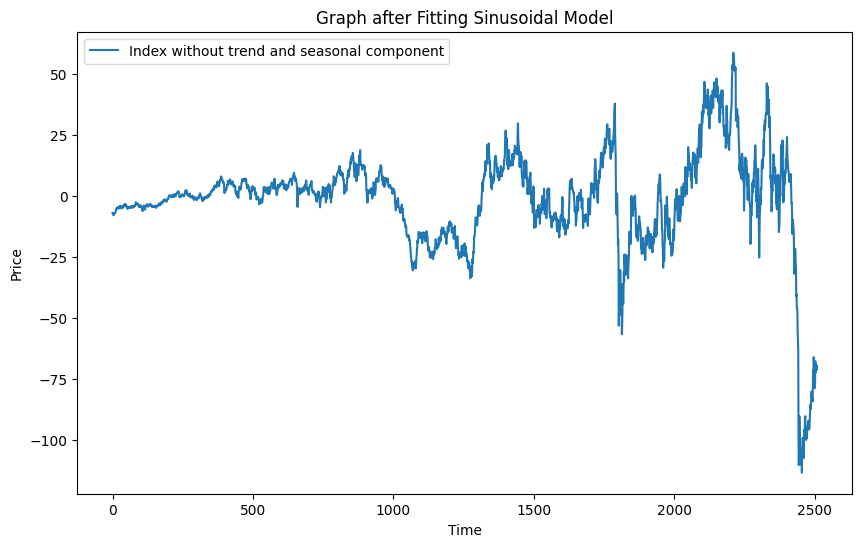

In [91]:
# Calculate the cycles and residuals
# series - trend - seasonal = cycles + residuals
cycles_res = seasonal_c_r - fitted_sin

# Seasonal component is equal to the fitted sin
seasonal = fitted_sin

# Plotting the residuals
plt.figure(figsize=(10, 6))  # Define the figure size
plt.plot(cycles_res, label='Index without trend and seasonal component')  # Plot the residuals
plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('Price')  # Set the y-axis label
plt.title('Graph after Fitting Sinusoidal Model')  # Set the plot title
plt.legend()
plt.show()  # Show the plot

### $ \textbf{4.4.1 Visualization of the correlation between days} $

<br>

The autocorrelation function (ACF) measures the correlation between a signal and its lagged versions. Information about the function and how to interpret the ACF is picked up from wikipedia (Durbin, 1960).

<br>

For a lag $k$ in a time series $x_t$, the autocorrelation coefficient $\text{ACF}(k)$ is calculated as:

<br>

$$
\text{ACF}(k) = \frac{\sum_{t=k+1}^{N} (x_t - \bar{x})(x_{t-k} - \bar{x})}{\sum_{t=1}^{N} (x_t - \bar{x})^2}
$$

<br>

#### Where:
- $x_t$ represents the value of the time series at time $t$  
- $\bar{x}$ is the mean of the time series  
- $N$ is the total number of observations in the time series

<br>

The formula calculates the correlation by comparing deviations from the mean at time $t$ and at time $t-k$.

<br>

In Python, the computation for the autocorrelation coefficient for a particular lag $i$ can be expressed as:

<br>

$$
\text{acf_values}[i]=np.corrcoef(\text{cycles_res}[i:], \text{cycles_res}[:-i])[0, 1]
$$

<br>

#### Where:
- ${cycles\_res[i:]}$ represents the time series starting from index $i$
- ${cycles\_res[:-i]}$ represents the time series without the last $i$ elements
- ${np.corrcoef(...)}$ calculates the Pearson correlation coefficient between these two time series arrays.


<ipython-input-92-e9101c974df3>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, lags + 1), acf_values, use_line_collection=True)  # Using stem plot for ACF


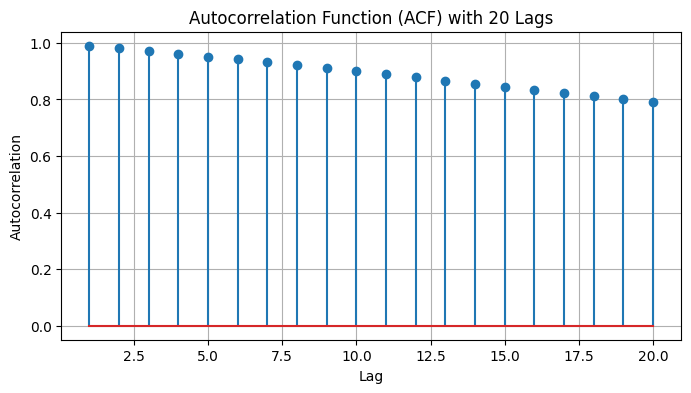

In [92]:
# Calculate autocorrelation manually for 20 lags
lags = 20
acf_values = [np.corrcoef(cycles_res[i:], cycles_res[:-i])[0, 1] for i in range(1, lags + 1)]

# Plot the ACF
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
plt.stem(range(1, lags + 1), acf_values, use_line_collection=True)  # Using stem plot for ACF
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) with 20 Lags')
plt.grid(True)
plt.show()


<br>

There is a lot of positive correlation between the days in the time series. There is 80 per cent autocorrelation between the the first day and the next 17 days, roughly estimate by looking at the model. This means that a given day is highly influenced by the previous days. This is normal in financial time series since investors buy and sell based on the preveious data. This means that we have evidence to make a lot of lag variables in order to remove this autocorrelation. But to many lag variables can lead to overfitting which is accociated with bad models that can not be used on new data.

<br>

In our analysis we will use 10 lag variables so that we dont overfit the data.

### $ \textbf{4.4.2 OLS regression with AR model} $

<br>

We use the same procedure in this OLS regression as the one showed when we found the trend in the index. We use OLS regression:

<br>

$$\hat{y} = X*\beta + \epsilon $$

<br>

$$\hat{y} = np.dot(X,\ Betas)$$

<br>

$$\hat{\beta} = (((X^{T}*X)^{-1}) X^T )y$$

<br>

$$
\hat{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{10} \\
\end{bmatrix}
$$

<br>

$$
X\_lag = \begin{bmatrix}
1 & x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5} & x_{1,6} & x_{1,7} & x_{1,8} & x_{1,9} & x_{1,10} \\
1 & x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} & x_{2,5} & x_{2,6} & x_{2,7} & x_{2,8} & x_{2,9} & x_{2,10} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{i,1} & x_{i,2} & x_{i,3} & x_{i,4} & x_{i,5} & x_{i,6} & x_{i,7} & x_{i,8} & x_{i,9} & x_{i,10} \\
\end{bmatrix}
$$

<br>

$$
\begin{equation}
\hat{y}\_{lag} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\end{bmatrix} = \begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,10} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,10} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \dots & x_{i,10} \\
\end{bmatrix} \times \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{10} \\
\end{bmatrix} + \begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_i \\
\end{bmatrix}
\end{equation}
$$

<br>

To analyze the relationship between a time series and its lagged versions, a matrix approach is utilized. Consider the time series $cycles\_res$ and its lagged variables $lag1$ to $lag10$ derived by rolling the time series by 1 to 10 positions, excluding the initial 10 elements:

<br>


In [ ]:
# Creating arrays for lag1 and lag2
lag1 = np.roll(cycles_res, 1)[10:]
lag2 = np.roll(cycles_res, 2)[10:]
lag3 = np.roll(cycles_res, 3)[10:]
lag4 = np.roll(cycles_res, 4)[10:]
lag5 = np.roll(cycles_res, 5)[10:]
lag6 = np.roll(cycles_res, 6)[10:]
lag7 = np.roll(cycles_res, 7)[10:]
lag8 = np.roll(cycles_res, 8)[10:]
lag9 = np.roll(cycles_res, 9)[10:]
lag10 = np.roll(cycles_res, 10)[10:]

# Create a matrix 'x' with lagged variables and a constant term
constant = np.ones((len(cycles_res)-10, 1))  # Constant term

# Stack lag1 and lag2 arrays along with the constant term to form 'x_lag'
x_lag = np.column_stack([constant, lag1, lag2, lag3, lag4, lag5, lag6, lag7, lag8, lag9, lag10])

#Yarray is the original series but without the initial elements used for lagged variables
y_lag = np.array(cycles_res)[10:]

# Perform matrix multiplication to get the beta coefficients
betas_lag = np.dot(np.dot(np.linalg.inv(np.dot(x_lag.T, x_lag)), x_lag.T), y_lag)

# Print the beta coefficients
print("Beta Coefficients:", betas_lag)

In [ ]:
# Matrix multiplicating the lag variables and their betacoefficients
y_lag = np.dot(x_lag, betas_lag)

# Creating the cycles component as the y_lag
cycles = y_lag

In [ ]:
# Removing the lag variables from the cycles_res to get the residual component
res = cycles_res[10:] - y_lag

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(seasonal_c_r, label='Data without the trend')
plt.plot(y_lag, label='Cycles Component')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Fitting Sine Function to Stock Price Data')
plt.show()

In [ ]:
mape = np.mean(np.abs(cycles - seasonal_c_r[10:]) / np.abs(seasonal_c_r[10:]))
print('MAPE: ' + str(mape))

We can see that the cycles component correlates to the data without the trend but with some variation in the beginning. In the beginning there is a lot of variation in the cycles, after 1000 trading days the graph correlates very well.

<br>

## $\textbf{4.5 Analysis of the components}$

<br>

Stocks act different and the different components represent valuable information for investors and speculators. Therefore we will analyse the different components separately.

In [ ]:
# Creates a figure and the axes for the sets of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plotting the different sub plots
axs[0, 0].plot(trend, label='quad_trend')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Stock Price')
axs[0, 0].legend()

axs[0, 1].plot(fitted_sin, label='fitted_sin')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Stock Price')
axs[0, 1].legend()

axs[1, 0].plot(cycles, label='cycles')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Stock Price')
axs[1, 0].legend()

axs[1, 1].plot(res, label='Residuals')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Stock Price')
axs[1, 1].legend()

plt.show()



<br>

#### Quad Trend (OLS regression):

The trend depicts an exponential trend, suggesting that the index grows over time. This may indicate a strong and sustained driving force behind the index's growth.The trend component is the effect of the compound interest. Because of the economic growth the governments are printing more money which leads to inflation and increased compoud interest effect on stocks. By removing this trend we can see the actual development of our stock portifolio.

<br>

#### Seasonal Variation (Discrete Fourier Analysis):

The fitted sin is very interesting since it can give us information on the cycle of the stock. We found it by finding the peak frequency in the data with the algorithm fast fourier transform and a Discrete Fourier Transform matrix. The cycle tell us wether or not the stocks are on a high or low. These fluctuations might be associated with seasonal factors, such as quarterly or annual cycles in the economy or industry such as business cycles. We can forecast peaks and lows in the future with the seasonal component. Forecasting indicates the next peak will occur in 1255 trading days, while the subsequent valley is expected in about 2510 trading days. A stock with a lower estimated period will have more fluctations and variation compared to our index. One reason for the low variation is because we estimated a optimal portifolio where we minimized the standard deviation. Optimal portfolio construction aims to minimize standard deviation, potentially leading to lower variation due to strategic diversification and risk management.

<br>

#### Cycles (OLS Regression):

The cycles component is very much alike the original index we started with in shape and trend. This was found by creating an array with lagged variables and then find the betas for the data. I will describe the cycles component as overfitted and therefor i will not use it in further modelling and and analysis. The reason for the low explanatory power is because there is a lot of autocorrelation in the data and therefor i would have to add hundreds of lags to remove the autocorrelation.

<br>

#### Residuals:

Residuals is the random variation in the time series that cannot be explained by trend, seasonality or cycles. In the end we are left with the residuals, cyclic bahaviour, seasonality and trend as four different components. The trend and seasonality represents the changes in the graph in the long term, while the cycles and residuals can be used understand the index in the short term. If this line is close to zero, it indicates that your model (which includes trend and seasonal variation) effectively explains the variation in the index. In the first half the line is close to zero but the other half shows a lot of variation that the model are not able to pick up on. However, if this line shows significant deviations from zero, there might be other factors at play that your model does not account for.

# $ \textbf{5. Conclusion} $

The work done in this project has given us a complete model that applies mathematics to financial concepts allowing us to in theory analyse any combination of stocks available on Yahoo Finance. Application of nonlinear programming to a portfolio of stocks gave us an optimized portfolio that maximizes risk-adjusted return giving us an optimal investment strategy. Further visualization of the CML and Efficient Frontier gives an investor further choices in adapting his/hers investment strategy depending on their preferences. The model itself gave us good results, with further testing and hyperparameter tuning we could possibly achieve even better results. In real-world applications its important to take into account factors this simple model doesn't take into account such as transaction costs. It is also possible the model is overfit to the historical data and doesn't generalize into the real-world both here and in the next part.

<br>

By matrix multiplication we created an index at time zero using the optimally chosen portfolio of stocks. The final index value in our portfolio is then used to forecast with the estimated return as the deterministic component and the estimated standard deviation as the stochastic component. We used the a numerical method, Euler method to solve the differential equation. The degree of volatility differs among the simulated stocks, indicating varying levels of uncertainty surrounding the stock's future price. Some paths exhibit greater fluctuations, signifying higher volatility and increased potential for both gains and losses. As time progresses, the divergence among the lines becomes more pronounced, depicting the escalating uncertainty about the stock's future price. This widening divergence signifies the expanding range of potential outcomes, emphasizing the growing uncertainty the further into the future the projections extend. The median value of the simulated stock prices, illustrated by the central tendency line, portrays a consistent increase over time. Beginning just above 200 and concluding at a value surpassing 500, this upward trend further reinforces the positive outlook for the stock's future performance.

<br>

The time series analysis involves a decompositin process, breaking down the stock index into its constituent parts to gain a deeper understanding of its behavior over time. The Quad Trend analysis, conducted through Ordinary Least Squares (OLS), identified a sustained exponential growth trend attributed to economic factors and compounding interest. Removing this trend allowed a focused examination of the index's actual development, devoid of the exponential growth effect. Utilizing Fourier analysis facilitated the extraction of seasonal variations, unveiling cyclic patterns associated with cycles in the economy or industry. The frequency in our data showing the most highest amplitude equals a sinusoid wave of 2510 trading days, with a peak at 1255 days. Our fitting process was not able to detect any pattern in the data that is continous over shorter periods. The seasons in the data are longer, this can be explained by the optimization process in the first chapter where we reduced risk (standard deviation) which is the risk in the short term. We tried to identify the cyclic component through lag variables, however, faced challenges due to significant autocorrelation in the data. Consequently, this component was excluded from further analysis due to its limited explanatory power. Finally, the residuals represented unexplained variations in the index after accounting for trend, seasonality, and cycles. These fluctuations shed light on short-term changes and factors not accommodated by the current model.The residuals are near zero in the beginning but there are much more fluctations after the first 5 years.

#$\textbf{Reference list}$
- The Periodogram | STAT 510. (2023, desember 7). https://online.stat.psu.edu/stat510/lesson/6/6.1
- AR Order Selection with Partial Autocorrelation Sequence—MATLAB & Simulink—MathWorks Nordic. (2023, november 23). https://se.mathworks.com/help/signal/ug/ar-order-selection-with-partial-autocorrelation-sequence.html
Chen, J. (2020, april 22).
- Style Drift: What it Means, How it Works, Due Diligence. Investopedia. https://www.investopedia.com/terms/s/styledrift.asp
Durbin, J. (1960).
- The Fitting of Time-Series Models. Revue de l’Institut International de Statistique / Review of the International Statistical Institute, 28(3), 233–244. JSTOR. https://doi.org/10.2307/1401322
- Frequency & Period: Definition, Formulas & Units (w/ Diagrams & Examples). (2023, desember 8).
- Sciencing. https://sciencing.com/frequency-period-definition-formulas-units-w-diagrams-examples-13721040.html
Hervik, S. (2023).
- Eulers metode. I Store norske leksikon. https://snl.no/Eulers_metode
Kloeden, P. E., & Platen, E. (1992).
- Stochastic Differential Equations. I P. E. Kloeden & E. Platen (Red.), Numerical Solution of Stochastic Differential Equations (s. 103–160). Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-662-12616-5_4
Mitchell, C. (2022, mai 23).
- Diffusion Index: Overview, Formula, Limitations. Investopedia. https://www.investopedia.com/terms/d/diffusionindex.asp
numpy.fft.fft—NumPy v1.26 Manual. (2023, november 20). https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html
- Nyquist Frequency. (2015, mai 11). Techopedia. https://www.techopedia.com/definition/21075/nyquist-frequency
- Peak frequency—Glossary of Meteorology. (2023, desember 7). https://glossary.ametsoc.org/wiki/Peak_frequency
Shmueli, G., Bruce, P. C., Gedeck, P., & Patel, N. R. (2019).
- Data Mining for Business Analytics: Concepts, Techniques and Applications in Python. John Wiley & Sons. https://books.google.no/books?hl=en&lr=&id=Z7G2DwAAQBAJ&oi=fnd&pg=PP1&dq=data+mining+for+business+analytics+2020&ots=KybdHB_JJA&sig=YluyxY6yrVu98f-Is6QnaXBs4ko&redir_esc=y#v=onepage&q&f=false
Tabago, M. (2021).
- «Discrete Fourier transform», Lectures on matrix algebra. https://www.statlect.com/matrix-algebra/discrete-Fourier-transform
- Time Domain Analysis vs Frequency Domain Analysis: A Guide and Comparison. (2022, mars 17). https://resources.pcb.cadence.com/blog/2020-time-domain-analysis-vs-frequency-domain-analysis-a-guide-and-comparison
Vasco. (2014, oktober 22).
- Answer to «How do I fit a sine curve to my data with pylab and numpy?» Stack Overflow. https://stackoverflow.com/a/26512495
Weisstein, E. W. (2023a, desember 6).
- Fast Fourier Transform [Text]. Wolfram Research, Inc. https://mathworld.wolfram.com/
Weisstein, E. W. (2023b, desember 8).
- Wiener Process [Text]. Wolfram Research, Inc. https://mathworld.wolfram.com/
- What is a cycle in a wave? [Answered!]. (2022, september 28). https://physics-network.org/what-is-a-cycle-in-a-wave/
- Varoquaux, G. (2022). 2.7. Mathematical optimization: Finding minima of functions—Scipy lecture notes. Scipy Lectures. https://scipy-lectures.org/advanced/mathematical_optimization/
- Brown, S. D. (2009). Comprehensive chemometrics: Chemical and biochemical data analysis. Elsevier.
- Bradley, S. P., Hax, A. C., & Magnanti, T. L. (1977). Applied mathematical programming. Addison-Wesley Pub. Co.
- Fernando, J. (2023). Sharpe Ratio: Definition, Formula, and Examples. Investopedia. Retrieved 12 December 2023, from https://www.investopedia.com/terms/s/sharperatio.asp
- Skjermingsrente for aksjer og enkeltpersonforetak. (2023). Skatteetaten. Retrieved 12 December 2023, from https://www.skatteetaten.no/satser/skjermingsrente-for-aksjer-og-enkeltpersonforetak/
- Modern Portfolio Theory: What MPT Is and How Investors Use It. (2023). Investopedia. Retrieved 12 December 2023, from https://www.investopedia.com/terms/m/modernportfoliotheory.asp
- Using linear interpolation to construct new data points. (2023). Apple Developer. Retrieved 12 December 2023, from https://developer.apple.com/documentation/accelerate/using_linear_interpolation_to_construct_new_data_points
- Ganti, A. (2022, June 27). Understanding Capital Market Line (CML) and How to Calculate It. Investopedia. https://www.investopedia.com/terms/c/cml.asp
- Ganti, A. (2023, June 28). Efficient Frontier: What It Is and How Investors Use It. Investopedia. https://www.investopedia.com/terms/e/efficientfrontier.asp
- Chen, J. (2023, September 26). Expected Return: Formula, How It Works, Limitations, Example. Investopedia. https://www.investopedia.com/terms/e/expectedreturn.asp


